In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



In [4]:
def evauation_model(pred, y_val):
    score_MSE = round(mean_squared_error(pred, y_val),2)
    score_MAE = round(mean_absolute_error(pred, y_val),2)
    score_r2score = round(r2_score(pred, y_val),2)
    return score_MSE, score_MAE, score_r2score

In [5]:
def models_score(model_name, train_data, y_train, val_data, y_val):
    model_list = ["Decision_Tree", "Random_Forest", "XGboost_Regressor"]
    # model_1
    if model_name == "Decision_Tree":
        reg = DecisionTreeRegressor(random_state=42)
    # model_2
    elif model_name == "Random_Forest":
        reg = RandomForestRegressor(random_state=42)

    # model_3
    elif model_name == "XGboost_Regressor":
        reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, )
    else:
        print("please enter correct regressor name")

    if model_name in model_list:
        reg.fit(train_data, y_train)
        pred = reg.predict(val_data)

        score_MSE, score_MAE, score_r2score = evauation_model(pred, y_val)
        return round(score_MSE, 2), round(score_MAE, 2), round(score_r2score, 2)

In [6]:
data = pd.read_csv("data.csv",index_col=0)
ordinal_encoder = OrdinalEncoder()

# ordinal encoder
data[['hasAlzheimerDisease ']] = ordinal_encoder.fit_transform(data[['hasAlzheimerDisease ']])
data[['hasThyroidDisorders ']] = ordinal_encoder.fit_transform(data[['hasThyroidDisorders ']])
data[['hasSpinaBifida ']] = ordinal_encoder.fit_transform(data[['hasSpinaBifida ']])
data[['hasMultipleSclerosis ']] = ordinal_encoder.fit_transform(data[['hasMultipleSclerosis ']])
data[['hasHighBloodPressure ']] = ordinal_encoder.fit_transform(data[['hasHighBloodPressure ']])
data[['hasArthritis ']] = ordinal_encoder.fit_transform(data[['hasArthritis ']])
data[['hasCancer ']] = ordinal_encoder.fit_transform(data[['hasCancer ']])
data[['hasDementia ']] = ordinal_encoder.fit_transform(data[['hasDementia ']])
data[['hasDiabetes ']] = ordinal_encoder.fit_transform(data[['hasDiabetes ']])
data[['hasParkinsonDisease ']] = ordinal_encoder.fit_transform(data[['hasParkinsonDisease ']])
data[['hasHeartDisease ']] = ordinal_encoder.fit_transform(data[['hasHeartDisease ']])
data

,hasAlzheimerDisease,ChanceToHaveAlzheimerDisease,hasArthritis,ChanceToHaveArthritis,hasCancer,ChanceToHaveCancer,hasDementia,ChanceToHaveDementia,hasDiabetes,ChanceToHaveDiabetes,...,hasHighBloodPressure,ChanceToHaveHighBloodPressure,hasMultipleSclerosis,ChanceToHaveMultipleSclerosis,hasParkinsonDisease,ChanceToHaveParkinsonDisease,hasSpinaBifida,ChanceToHaveSpinaBifida,hasThyroidDisorders,ChanceToHaveThyroidDisorders
0,1.0,0.833333,0.0,0.4,1.0,0.8,0.0,0.4,0.0,0.4,...,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8,1.0,0.8
1,1.0,0.750000,0.0,0.4,1.0,1.2,0.0,0.2,1.0,0.6,...,1.0,1.2,1.0,1.2,1.0,1.2,1.0,1.2,1.0,1.2
2,0.0,0.500000,0.0,0.4,0.0,0.2,1.0,0.6,1.0,0.6,...,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2
3,0.0,0.500000,1.0,0.6,0.0,0.2,1.0,0.6,1.0,1.0,...,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.2
4,1.0,0.666667,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75430,0.0,0.500000,0.0,0.2,0.0,0.4,0.0,0.4,0.0,0.2,...,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4
75431,0.0,0.500000,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,...,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4
75432,0.0,0.500000,0.0,0.2,0.0,0.4,1.0,0.6,0.0,0.4,...,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0.0,0.4
75433,1.0,0.833333,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,...,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6,1.0,0.6


In [7]:
data_cleaned = data.drop(columns=['hasAlzheimerDisease '])

In [8]:
y=data['hasAlzheimerDisease ']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y, test_size=0.2, random_state=42)

In [10]:
label_encoder = LabelEncoder()

In [11]:
x_train['ChanceToHaveAlzheimerDisease '] = label_encoder.fit_transform(x_train['ChanceToHaveAlzheimerDisease '].values)
x_test['ChanceToHaveAlzheimerDisease '] = label_encoder.transform(x_test['ChanceToHaveAlzheimerDisease '].values)

In [12]:
model_list = ["Decision_Tree","Random_Forest","XGboost_Regressor"]

In [13]:
result_scores = []
for model in model_list:
    score = models_score(model, x_train, y_train, x_test, y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Decision_Tree (0.0, 0.0, 1.0)
Random_Forest (0.0, 0.0, 1.0)
XGboost_Regressor (0.0, 0.0, 1.0)


In [14]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores
#%%
num_estimator = [100, 150, 200, 250]

In [15]:
space = {'max_depth': hp.quniform("max_depth", 3, 18, 1),
         'gamma': hp.uniform('gamma', 1, 9),
         'reg_alpha': hp.quniform('reg_alpha', 30, 180, 1),
         'reg_lambda': hp.uniform('reg_lambda', 0, 1),
         'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
         'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
         'n_estimators': hp.choice("n_estimators", num_estimator),
         }

In [16]:
def hyperparameter_tuning(space):
    model = xgb.XGBRegressor(n_estimators=space['n_estimators'], max_depth=int(space['max_depth']),
                             gamma=space['gamma'],
                             reg_alpha=int(space['reg_alpha']), min_child_weight=space['min_child_weight'],
                             colsample_bytree=space['colsample_bytree'], objective="reg:squarederror")

    score_cv = cross_val_score(model, x_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()
    return {'loss': -score_cv, 'status': STATUS_OK, 'model': model}

In [17]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

100%|██████████| 10/10 [02:07<00:00, 12.71s/trial, best loss: 0.00588107624767103]


In [18]:
best['max_depth'] = int(best['max_depth']) # convert to int
best["n_estimators"] = num_estimator[best["n_estimators"]] # assing n_estimator because it returs the index
best_xgboost_model = xgb.XGBRegressor(**best)
best_xgboost_model.fit(x_train,y_train)
pred = best_xgboost_model.predict(x_test)
score_MSE, score_MAE, score_r2score = evauation_model(pred,y_test)
to_append = ["XGboost_hyper_tuned",score_MSE, score_MAE, score_r2score]
df_result_scores.loc[len(df_result_scores)] = to_append

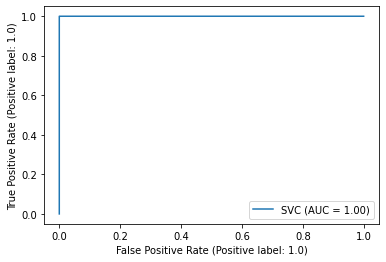

In [19]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)

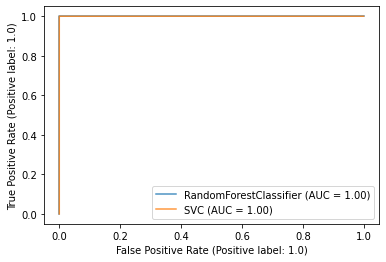

In [20]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(x_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)